In [ ]:

import torch
import numpy as np
import pandas as pd
import torch.nn as nn
import torch.optim as optim
import os
import matplotlib.pyplot as plt
import torch.nn.functional as F
%matplotlib inline
import random
import math

In [ ]:
import torchvision
import torchvision.transforms as transforms

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Device available now:', device)

Device available now: cuda


In [ ]:
image_transforms = transforms.Compose(
         [transforms.ToTensor(),
         transforms.CenterCrop(28),
         transforms.Normalize((0.5), (0.5))]
)

In [ ]:
batchsize = 256
rowsize = 28
colsize = 28
inchannels = 3
kernelsize = 5
stride = 1
padding = 0
poolsize = 3
fc_size1 = 384
fc_size2 = 192
no_classes = 10
epochs = 30

In [ ]:

train_ioc = []
test_ioc = 0
train_nn = []
noise = 40
test_nn = 0

In [ ]:
train = torchvision.datasets.CIFAR10(root='./', train=True, download=True, transform=image_transforms)
test = torchvision.datasets.CIFAR10(root='./', train=False, transform=image_transforms)



  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./cifar-10-python.tar.gz to ./


In [ ]:
traindata = torch.utils.data.DataLoader(train,batch_size=batchsize, shuffle=True, num_workers=2,pin_memory=True)
testdata = torch.utils.data.DataLoader(test,batch_size=batchsize, shuffle=False, num_workers=2,pin_memory=True)

In [ ]:
for i,data in enumerate(traindata):
  #data[0] , data[1]
  for j in range(len(data)):
    data[1][j] = random.randint(0, 9)

In [ ]:
class IOC_CNN(nn.Module):
  def __init__(self,inchannels,kernelsize,stride,padding,poolsize,fc_size1,fc_size2,no_classes):
    super(IOC_CNN, self).__init__()
    self.conv1 = nn.Conv2d(inchannels,24,kernelsize,stride,padding)
    self.pool1 = nn.MaxPool2d(poolsize,2)
    self.BatchNorm1 = nn.BatchNorm2d(24)
    self.conv2 = nn.Conv2d(24,48,kernelsize,stride,padding)
    self.pool2 = nn.MaxPool2d(poolsize,2)
    self.BatchNorm2 = nn.BatchNorm2d(48)
    self.fc1 = nn.Linear(432,fc_size1)
    self.fc2 = nn.Linear(fc_size1,fc_size2)
    self.fc3 = nn.Linear(fc_size2,no_classes)


  def forward(self, x):
    x = F.elu(self.conv1(x))
    x = self.pool1(x)
    x = self.BatchNorm1(x)
    x = F.elu(self.conv2(x))
    x = self.pool2(x)
    x = self.BatchNorm2(x)
    x = torch.flatten(x,1)
    x = F.elu(self.fc1(x))
    x = F.elu(self.fc2(x))
    x = F.elu(self.fc3(x))
    return x

In [ ]:
class NN_CNN(nn.Module):
  def __init__(self,inchannels,kernelsize,stride,padding,poolsize,fc_size1,fc_size2,no_classes):
    super(NN_CNN, self).__init__()
    self.conv1 = nn.Conv2d(inchannels,24,kernelsize,stride,padding)
    self.pool1 = nn.MaxPool2d(poolsize,2)
    self.BatchNorm1 = nn.BatchNorm2d(24)
    self.conv2 = nn.Conv2d(24,48,kernelsize,stride,padding)
    self.pool2 = nn.MaxPool2d(poolsize,2)
    self.BatchNorm2 = nn.BatchNorm2d(48)
    self.fc1 = nn.Linear(432,fc_size1)
    self.fc2 = nn.Linear(fc_size1,fc_size2)
    self.fc3 = nn.Linear(fc_size2,no_classes)


  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = self.pool1(x)
    x = self.BatchNorm1(x)
    x = F.relu(self.conv2(x))
    x = self.pool2(x)
    x = self.BatchNorm2(x)
    x = torch.flatten(x,1)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    return x

In [ ]:
ioc_model = IOC_CNN(inchannels,kernelsize,stride,padding,poolsize,fc_size1,fc_size2,no_classes).to(device)
nn_model = NN_CNN(inchannels,kernelsize,stride,padding,poolsize,fc_size1,fc_size2,no_classes).to(device)
# model = SimpleAlex(no_classes).to(device)

In [ ]:
ioc_optimizer = torch.optim.Adam(ioc_model.parameters(),lr= 0.0001)
nn_optimizer = torch.optim.Adam(nn_model.parameters(),lr= 0.0001)
criterion = nn.CrossEntropyLoss().to(device)

In [ ]:

for i in range(epochs):
  Loss = 0
  num_correct=0
  tot = 0
  for i,data in enumerate(traindata):
    # iterating through every batch
    x_data = data[0].to(device)
    labels = data[1].to(device)
    ioc_optimizer.zero_grad()
    outputs = ioc_model(x_data)
    _, pred = torch.max(outputs.data, 1)
    num_correct += (pred == labels).sum().item()
    tot += labels.size(0)
    loss = criterion(outputs, labels)
    loss.backward()
    ioc_optimizer.step()
    Loss += loss
    for w in ioc_model.parameters():
      p = w
      torch.where(w > 0, w, torch.exp(p))
  train_ioc.append(num_correct/tot)    
  print("Accuracy for exponentiation on negative weights : ",num_correct/tot)
  print("Loss for exponentiation on negative weights : ",loss.item())
  

Accuracy for exponentiation on negative weights :  0.41476
Loss for exponentiation on negative weights :  1.2716751098632812
Accuracy for exponentiation on negative weights :  0.53944
Loss for exponentiation on negative weights :  1.2937085628509521
Accuracy for exponentiation on negative weights :  0.57904
Loss for exponentiation on negative weights :  1.1946817636489868
Accuracy for exponentiation on negative weights :  0.603
Loss for exponentiation on negative weights :  1.109101414680481
Accuracy for exponentiation on negative weights :  0.62102
Loss for exponentiation on negative weights :  1.2188135385513306
Accuracy for exponentiation on negative weights :  0.63618
Loss for exponentiation on negative weights :  1.0446932315826416
Accuracy for exponentiation on negative weights :  0.65032
Loss for exponentiation on negative weights :  0.9329245686531067
Accuracy for exponentiation on negative weights :  0.66302
Loss for exponentiation on negative weights :  0.793621838092804
Accu

In [ ]:
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in testdata:
        images = images.to(device)
        labels = labels.to(device)
        outputs = ioc_model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    test_ioc = correct/total
    print("Test Accuracy for exponentiation of weights for IOC Architecture : ",100 * correct / total)



Test Accuracy for exponentiation of weights for IOC Architecture :  67.21


In [ ]:

for i in range(epochs):
  Loss = 0
  num_correct=0
  tot = 0
  for i,data in enumerate(traindata):
    # iterating through every batch
    x_data = data[0].to(device)
    labels = data[1].to(device)
    nn_optimizer.zero_grad()
    outputs = nn_model(x_data)
    _, pred = torch.max(outputs.data, 1)
    num_correct += (pred == labels).sum().item()
    tot += labels.size(0)
    loss = criterion(outputs, labels)
    loss.backward()
    nn_optimizer.step()
    Loss += loss
  train_nn.append(num_correct/tot)    
  print("Accuracy for exponentiation on negative weights : ",num_correct/tot)
  print("Loss for exponentiation on negative weights : ",loss.item())
  

Accuracy for exponentiation on negative weights :  0.36592
Loss for exponentiation on negative weights :  1.3662883043289185
Accuracy for exponentiation on negative weights :  0.53334
Loss for exponentiation on negative weights :  1.2326545715332031
Accuracy for exponentiation on negative weights :  0.58198
Loss for exponentiation on negative weights :  0.9819024205207825
Accuracy for exponentiation on negative weights :  0.61098
Loss for exponentiation on negative weights :  1.0140310525894165
Accuracy for exponentiation on negative weights :  0.6338
Loss for exponentiation on negative weights :  0.893841564655304
Accuracy for exponentiation on negative weights :  0.6546
Loss for exponentiation on negative weights :  0.9602478742599487
Accuracy for exponentiation on negative weights :  0.6671
Loss for exponentiation on negative weights :  0.9253517985343933
Accuracy for exponentiation on negative weights :  0.68488
Loss for exponentiation on negative weights :  0.994282603263855
Accur

In [ ]:
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in testdata:
        images = images.to(device)
        labels = labels.to(device)
        outputs = nn_model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    test_nn = correct/total
    print("Test Accuracy for exponentiation of weights with NN Architecture : ",100 * correct / total)



Test Accuracy for exponentiation of weights with NN Architecture :  68.23


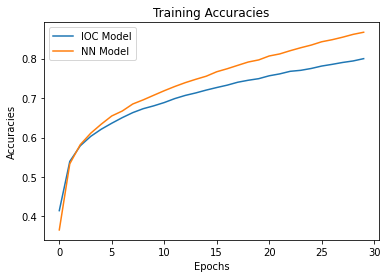

In [ ]:
import matplotlib.pyplot as plt
epoch_numbers = np.arange(0,epochs,1)
plt.title("Training Accuracies")
plt.xlabel("Epochs")
plt.ylabel("Accuracies")
plt.plot(epoch_numbers,train_ioc,label='IOC Model')
plt.plot(epoch_numbers,train_nn,label='NN Model')     
plt.legend()
plt.show()           

In [ ]:
print("Generalization Gap for NN Model",(train_nn[len(train_nn)-1]*100)-(test_nn*100))
print("Generalization Gap for IOC Model",(train_ioc[len(train_ioc)-1]*100)-(test_ioc*100))

Generalization Gap for NN Model 18.433999999999997
Generalization Gap for IOC Model 12.763999999999996
